# Regraph Viewer
### Load a regraph generated json file into networkx and view it

In [2]:
import json
import os
import sys
from pathlib import Path
import networkx as nx
from networkx.readwrite import json_graph

import matplotlib.pyplot as plt

In [3]:
def create_graph(json_file):
    with open(json_file) as file:
        json_data = json.load(file)
        G = json_graph.node_link_graph(json_data)
    return G

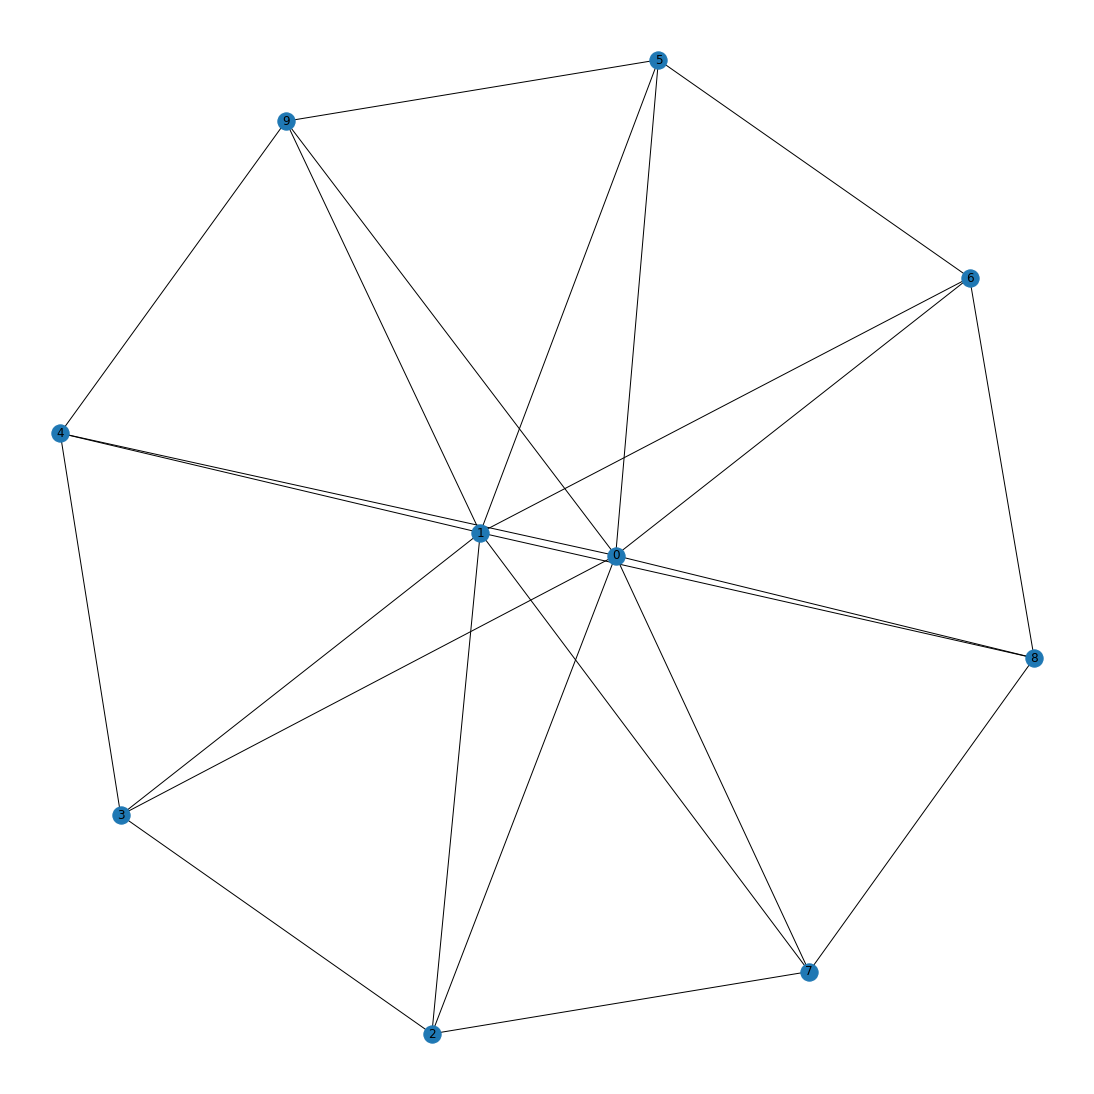

In [10]:
output_dir = Path() / "output"
regraph_file = output_dir / "Z0HexagonCutJoin_RootComponent_0001_0000.json"
G = create_graph(regraph_file)
plt.figure(figsize=(15,15)) 
nx.draw(G, with_labels=True)